# 1.1 Reading data from a csv file

We're going to be looking some cyclist data from Montréal. Here's the [original page](http://donnees.ville.montreal.qc.ca/dataset/velos-comptage) (in French). We're using the data from 2012.

This dataset is a list of how many people were on 7 different bike paths in Montreal, each day.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
%matplotlib inline

The downloaded file name ends with `.csv`, suggesting that this file is a [comma-separated values (CSV) file](https://en.wikipedia.org/wiki/Comma-separated_values).

With `pandas`, You can read data from a CSV file using the `read_csv` function. By default, it assumes that the fields are comma-separated.

In [15]:
df = pd.read_csv('comptagevelo2012.csv')
df.head()

,Date,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
0,01/01/2012,00:00,16,35,51,38,5.0,26,10,0,27.0
1,02/01/2012,00:00,43,83,153,68,11.0,53,6,1,21.0
2,03/01/2012,00:00,58,135,248,104,2.0,89,3,2,15.0
3,04/01/2012,00:00,61,144,318,116,2.0,111,8,1,19.0
4,05/01/2012,00:00,95,197,330,124,6.0,97,13,2,16.0


You'll notice that this seems to be a date-indexed dataset. Therefore, we have to add some arguments to make sure the `read_csv` can give us what we want:

* Parse the dates in the 'Date' column
* Tell it that our dates have the day first instead of the month first
* Set the index to be the 'Date' column

In [16]:
df = pd.read_csv('comptagevelo2012.csv', parse_dates=['Date'], dayfirst=True, index_col='Date')
df.head()

,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
Date,,,,,,,,,,
2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0
2012-01-02,00:00,43,83,153,68,11.0,53,6,1,21.0
2012-01-03,00:00,58,135,248,104,2.0,89,3,2,15.0
2012-01-04,00:00,61,144,318,116,2.0,111,8,1,19.0
2012-01-05,00:00,95,197,330,124,6.0,97,13,2,16.0


It looks better now, but we also notice that there is one column without name and carrying no information. We can remove that column by using `del`.

In [17]:
del df['Unnamed: 1']
df.head()

,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
Date,,,,,,,,,
2012-01-01,16,35,51,38,5.0,26,10,0,27.0
2012-01-02,43,83,153,68,11.0,53,6,1,21.0
2012-01-03,58,135,248,104,2.0,89,3,2,15.0
2012-01-04,61,144,318,116,2.0,111,8,1,19.0
2012-01-05,95,197,330,124,6.0,97,13,2,16.0


In [18]:
df.describe()

,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
count,366.000000,366.000000,366.000000,366.000000,146.000000,366.000000,366.000000,366.000000,317.000000
mean,2605.653005,2678.234973,3172.120219,1783.762295,630.691781,1698.114754,907.019126,1109.306011,1435.914826
std,2010.385246,2149.301945,2463.726403,1435.398169,918.796008,1318.520253,1039.620662,933.862044,1861.063051
min,0.000000,4.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,441.500000,433.500000,604.000000,292.250000,7.000000,309.500000,18.500000,26.500000,22.000000
50%,2458.500000,2326.000000,3044.000000,1702.000000,26.500000,1709.500000,509.500000,1085.500000,1259.000000
75%,4496.000000,4642.750000,5050.000000,2993.000000,1184.500000,2895.500000,1517.500000,1868.000000,2440.000000
max,6595.000000,7104.000000,8220.000000,4999.000000,3278.000000,4510.000000,4386.000000,3124.000000,23092.000000


Now everything looks just fine :-)

# 1.2 Selecting a column

When you read a CSV, you get a kind of object called a `DataFrame`, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

Here's an example:

In [8]:
df['Berri1']

Date
2012-01-01      35
2012-01-02      83
2012-01-03     135
2012-01-04     144
2012-01-05     197
2012-01-06     146
2012-01-07      98
2012-01-08      95
2012-01-09     244
2012-01-10     397
2012-01-11     273
2012-01-12     157
2012-01-13      75
2012-01-14      32
2012-01-15      54
2012-01-16     168
2012-01-17     155
2012-01-18     139
2012-01-19     191
2012-01-20     161
2012-01-21      53
2012-01-22      71
2012-01-23     210
2012-01-24     299
2012-01-25     334
2012-01-26     306
2012-01-27      91
2012-01-28      80
2012-01-29      87
2012-01-30     219
              ... 
2012-12-02     324
2012-12-03    1286
2012-12-04    1264
2012-12-05    1204
2012-12-06    1252
2012-12-07    1151
2012-12-08     382
2012-12-09     427
2012-12-10     245
2012-12-11     517
2012-12-12     598
2012-12-13     655
2012-12-14     738
2012-12-15     335
2012-12-16     177
2012-12-17     236
2012-12-18     242
2012-12-19     346
2012-12-20     433
2012-12-21     178
2012-12-22      84
2012-12

# 1.3 Plotting a column

Just add `.plot()` to the end! How could it be easier? :-)

We can see that, unsurprisingly, not many people are biking in winter, say, January, February, and March.

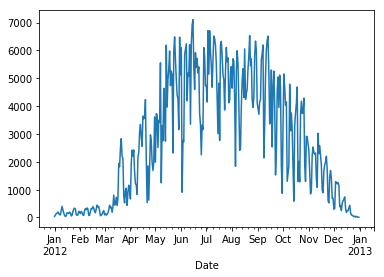

In [9]:
df['Berri1'].plot()

# 1.4 Putting all that together

We can also plot all the columns just as easily. We'll make it a little bigger, too.
You can see that it's more squished together, but all the bike paths behave basically the same -- if it's a bad day for cyclists, it's a bad day everywhere.

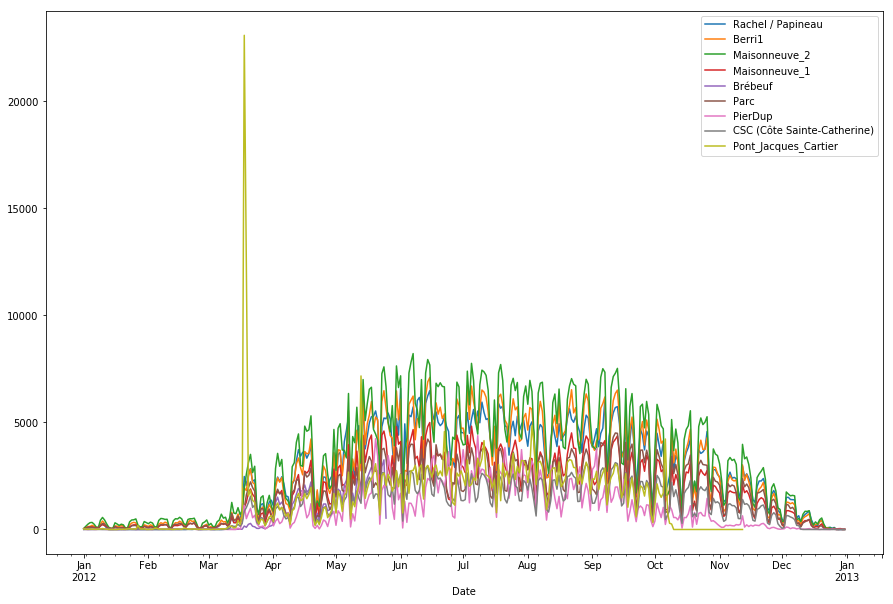

In [10]:
df.plot(figsize=(15, 10))

# 1.5 Questions

1. 除了季節造成的波動模式外，在更小的時間尺度上似乎也能觀察到週期性振盪模式，可能是何種因素造成的？你如何實際去判斷呢？
2. 似乎有個極端峰值出現在3月下旬的Pont Jacques Cartier，你覺得這會是真實情況嗎？又或者可能只是錯誤的資料點(e.g., 監測儀器出錯或是登記資料時的人為錯誤)？你要如何判斷呢？
3. 一個簡單的作法是再去檢查同一個地點前數年與後數年的資料，看看是否出現相同的情況。請到原始資料來源處下載其他年份的檔案，觀察是否出現類似的情形。
